# Individual Plan

### by Jiaqi Zhuang

[github link] https://github.com/Jacky041027/DSCI100-Individual-plan.git

## load package and importing data

In [22]:
library(tidyverse)
url_players = "https://drive.google.com/uc?export=download&id=1O2STL-2mALpE7A-jcLunNIPFLTl9qqk3"
players <- read_csv(url_players)
head(players)
dim(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


[1] 196   7

In [88]:
distinct(players,experience)
distinct(players,subscribe)
distinct(players,gender)
players |> summarize(mean_played_hours = mean(played_hours, na.rm = TRUE),
                        mean_age = mean(Age, na.rm = TRUE))

experience
<chr>
Pro
Veteran
Amateur
Regular
Beginner


subscribe
<lgl>
TRUE
FALSE


gender
<chr>
Male
Female
Non-binary
Prefer not to say
Agender
Two-Spirited
Other


mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


In [24]:
url_sessions = "https://drive.google.com/uc?export=download&id=1CGaEHZpCWhF67dNKkFxO5GnWHyvGy0yd"
sessions <- read_csv(url_sessions)
head(sessions)
dim(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


[1] 1535    5

## Data description
### Players
#### There are 196 obervations and 7 variables, including

* `experience`, character, experience level of players, as: `Pro`,`Veteran`,`Amateur`.`Regular`and`Beginner`
* `subscribe`, logical, whether or not player has subscribed, as: `True`and`False`
* `hashedEmail`, character, hashed email addrsses of players
* `played_hours`, double, the game playing in hours
* `name`, character, names of players
* `gender`, character, gender of players, as: `Male`,`Female`,`Non-binary`.`Prefer not to say`,`Agender`,`Two-Spirited`and`Other`
* `Age`, double, age of players

### Sessions
#### There are 1535 obervations and 5 variables, including

* `hashedEmail`, character, hashed email addrsses of players
* `start_time`, character, start time of the lastest game
* `end_time`, character, end time of the lastest game
* `original_start_time`, double, original data of `start_time`, not human readable
* `original_end_time`, double, original data of `end_time`, not human readable

## Potential Issues

1. `HashedEmail` may be useless in our data
2. `original_start_time` and `original_end_time` are not human readable and useless, need deleted
3. `experience` is not numerical, cannot be used directly as a predictor

## Data Visualization

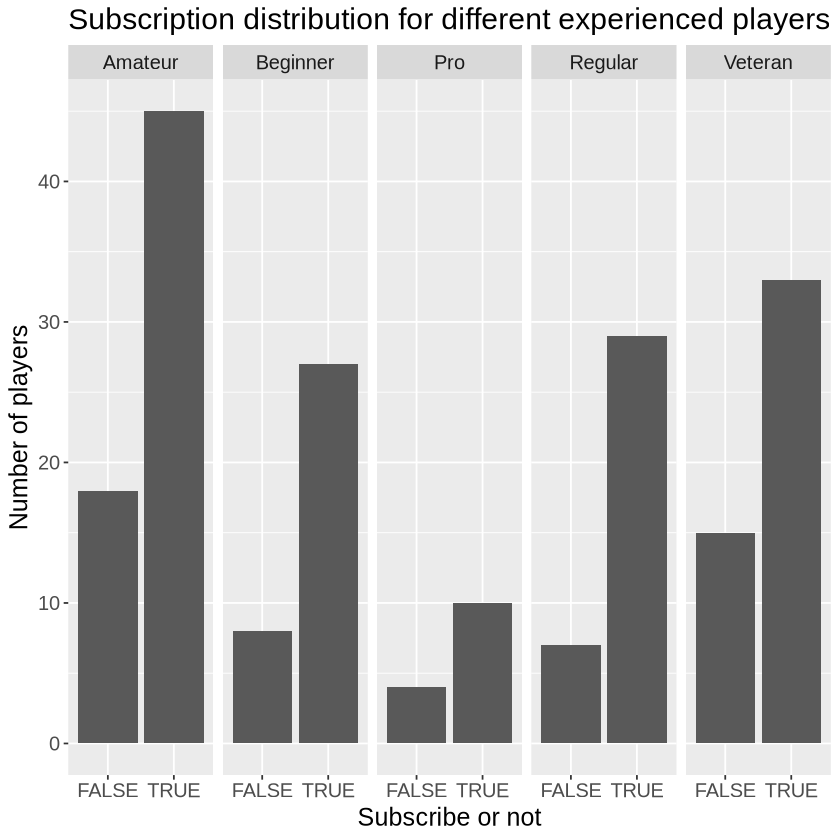

In [69]:
ggplot(players,aes(x=subscribe,))+
geom_bar()+
facet_grid(cols=vars(experience))+
labs(x="Subscribe or not",y="Number of players",title="Subscription distribution for different experienced players")+
theme(text=element_text(size=15))

We can see that `Amateur` are most likely to subscribe while `Pro` are least likely to subscribe.The other three categories are similarly distributed, as a predictor, its predictive ability may be relatively weak.

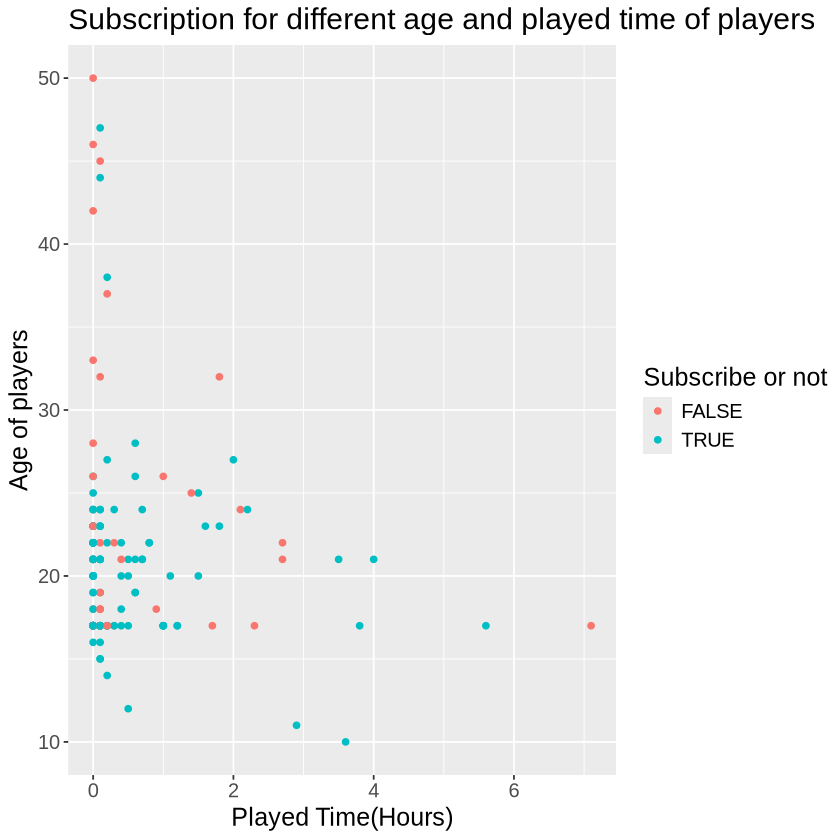

In [74]:
players |> filter(played_hours <=10 & Age<= 50) |>
ggplot(aes(x=played_hours,y=Age))+
geom_point(aes(color=subscribe))+
labs(x="Played Time(Hours)",y="Age of players",color="Subscribe or not",
     title="Subscription for different age and played time of players")+
theme(text=element_text(size=15))

The dataset has been refined by removing some outliers, focusing on players with played hours ≤ 10 and age ≤ 50. We can see that 
players whose played hours ≤ 4 and age between 10~30 are more likely to subscribe. So we may use `Age` and `played_hours` as predictors.

## Selected Question

#### I select to answer:
##### **Question 1**: `What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?`

* #### Why is this method appropriate?  
  As `subscribe` is categorical, I need to use **knn classification** to solve the question.   
  I will use `Age`and`played_hours` as predictor to predict `subscribe`.  

* #### Which assumptions are required, if any, to apply the method selected?  
  We assume that other factors do not affect the subscription outcome.  

* #### What are the potential limitations or weaknesses of the method selected?
  There's a potential limitation that other factors may affect whether players subscribe or not but we did not take in consideration.

* #### How are you going to compare and select the model?
  I'll split the data into training and testing data.

* #### How are you going to process the data to apply the model? 
  I will first use cross-validation and tuning k to select the optimal k for the classifier. After applying the best k value to the training set, I will use the testing set to evaluate the model's accuracy, assess its performance, and discuss potential improvements.